In [2]:
# Quelques imports nécéssaires au bon déroulement du projet

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Partie I : Orbite d'un corps autour du soleil

Ici, on va tenter de formaliser l'orbite d'un corps autour d'une planète en passant par les expressions des différentes anomalies.

D'abord, l'anomalie moyenne M peut être calculée facilement en fonction du temps et du moyen mouvement d'une planète. Ces moyens mouvements sont facilement trouvables sur le net.

On va effectuer nos calculs pour la planète Terre afin d'éprouver leur efficacité.

In [3]:
# Fonction calculant l'anomalie moyenne en fonction du temps, du moyen mouvement d'un corps,
#et de l'origine des temps, passage de la planète au périapside
def M(t,m,t0):
    return m*(t-t0)

On peut utiliser cette anomalie moyenne pour déterminer l'anomalie excentrique à un instant t.
Le détail du calcul est trouvable sur la page wikipedia de l'anomalie excentrique.

In [4]:
# Fonction calculant l'anomalie excentrique en fonction de l'anomalie moyenne et de l'excentricité
def E(M,e):
    E = M
    for i in range(0,5):
        E = M + e * np.sin(E)
    return E

De cette anomalie excentrique peut être déduite l'anomalie vrai à l'instant t.

In [5]:
def V(E,e):
    return 2*np.arctan((np.sqrt(1+e)/np.sqrt(1-e))*np.tan(E/2))

Finalement, on utilise cette anomalie vraie pour déterminer la distance du corps à son astre, en fonction du demi grand-axe a.

In [6]:
def R(anom, a, e):
    return ((a*(1-e**2))/(1+e*np.cos(anom)))

Eprouvons maintenant ces méthodes sur l'orbite terrestre. Cette orbite dure 365 jours environ. Cela donne 31536000 secondes.

In [7]:
year=31536000 #s
nbdays=365 #j
time=np.linspace(0,year,nbdays)
ex_terre=0.01671022
a=149.6*10**9 #m
mm=1.9907e-7 #rad/s
t0=0 #s


#Calcul pour la terre
M_terre=M(time,mm,t0)
E_terre=E(M_terre,ex_terre)
V_terre=V(E_terre,ex_terre)
R_terre=R(V_terre,a,ex_terre)

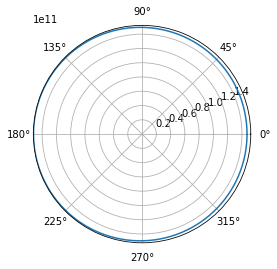

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(V_terre,R_terre)
plt.show()

### Partie 2 : Orbite des planètes du système solaire autour du soleil

Afin de calculer l'anomalie vraie et la distance du corps à son astre pour toutes les autres planètes, on créé un fichier dataplanets.csv comprenant les données récupérées sur les sites du JET PROPULSION LABORATORY. 

In [9]:
#Ajout des données pour les orbites des différentes planètes 
data=pd.read_csv('dataplanets.csv',delimiter=',' )


#Organisation des données par listes
nom = data.PLANETE.tolist()
demi_gd_axe=data.DEMIGRANDAXE.tolist()
excentricite=data.EXCENTRICITE.tolist()
temps_sec=data.PERIODESEC.tolist()
temps_jours=data.PERIODEJOUR.tolist()

#Calcul du moyen mouvement pour les différentes planètes
moy_mouv=[]
for i in range(len(nom)):
    moy_mouv.append((2*np.pi)/temps_sec[i])

#Création des listes pour les valeurs calculées
M_list=[]
E_list=[]
V_list=[]
R_list=[]
T_list=[]


#Remplissage des listes pour le calcul des orbites
for i in range(len(nom)):
    T_list.append(np.linspace(0,int(temps_sec[i]),int(temps_jours[i])))
    M_list.append(M(T_list[i],moy_mouv[i],t0))
    E_list.append(E(M_list[i],excentricite[i]))
    V_list.append(V(E_list[i],excentricite[i]))
    R_list.append(R(V_list[i],demi_gd_axe[i],excentricite[i]))
    


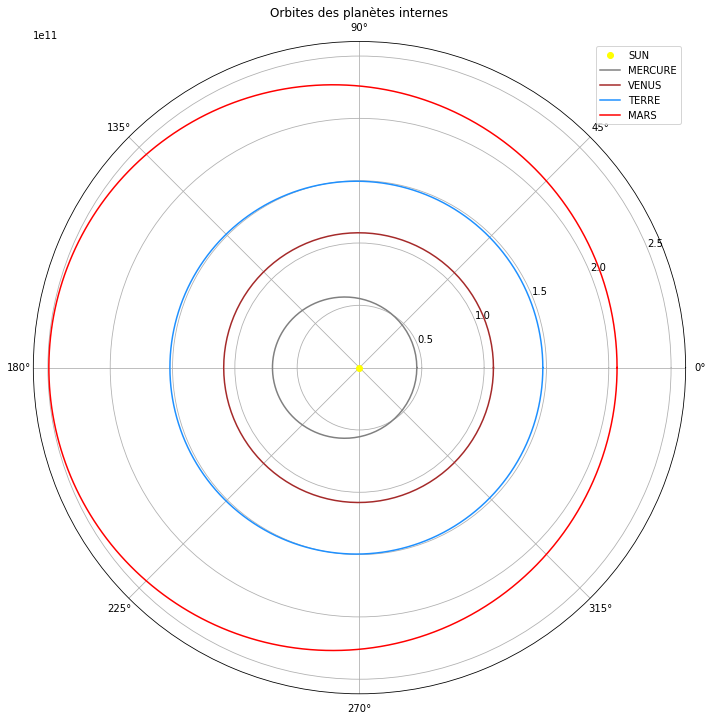

In [10]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

ax.plot(0,0,'ro',c='yellow',label='SUN')

ax.plot(V_list[0],R_list[0], c='grey', label='MERCURE')
ax.plot(V_list[1],R_list[1], c='brown', label='VENUS')
ax.plot(V_list[2],R_list[2], c='dodgerblue', label='TERRE')
ax.plot(V_list[3],R_list[3], c='red', label='MARS')



plt.title("Orbites des planètes internes")


legend = plt.legend(loc = 'best')


plt.show()

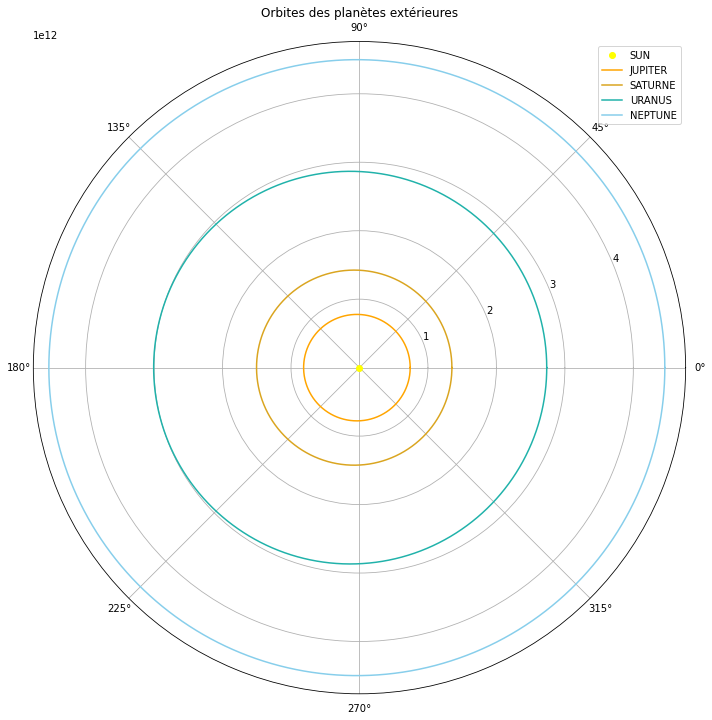

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

#Le soleil
ax.plot(0,0,'ro',c='yellow',label='SUN')

#Les planètes extérieures
ax.plot(V_list[4],R_list[4], c='orange', label='JUPITER')
ax.plot(V_list[5],R_list[5], c='goldenrod', label='SATURNE')
ax.plot(V_list[6],R_list[6], c='lightseagreen', label='URANUS')
ax.plot(V_list[7],R_list[7], c='skyblue', label='NEPTUNE')

plt.title("Orbites des planètes extérieures")

legend = plt.legend(loc = 'best')

plt.show()


On passe ensuite en coordonnées cartésiennes pour plot en 3d et avoir une représentation en perspective.  

In [148]:
#Passage en coordonnées cartésiennes pour plot en 3d
#Si on peut avoir l'angle Theta (en coordonnée cylindrique) en fonction du temps, on pourra plot en 3d avec
#les bons angles d'orbites 


def pol2cart(rho, phi,theta):
    x = rho * np.sin(theta) * np.cos(phi)
    y = rho * np.sin(theta) * np.sin(phi)
    z = rho * np.cos(theta)
    return(x,y,z)

#Juste pour tester, mais il faut les orbites en fonction du temps au lieu d'un angle fixe
ANGLES=[83,86.6,90,88.1,88.7,87.5,89.2,88.2]


MERCURE=pol2cart(R_list[0],V_list[0],ANGLES[0])
VENUS=pol2cart(R_list[1],V_list[1],ANGLES[1])
TERRE=pol2cart(R_list[2],V_list[2],ANGLES[2])
MARS=pol2cart(R_list[3],V_list[3],ANGLES[3])
JUPITER=pol2cart(R_list[4],V_list[4],ANGLES[4])
SATURNE=pol2cart(R_list[5],V_list[5],ANGLES[5])
URANUS=pol2cart(R_list[6],V_list[6],ANGLES[6])
NEPTUNE=pol2cart(R_list[7],V_list[7],ANGLES[7])



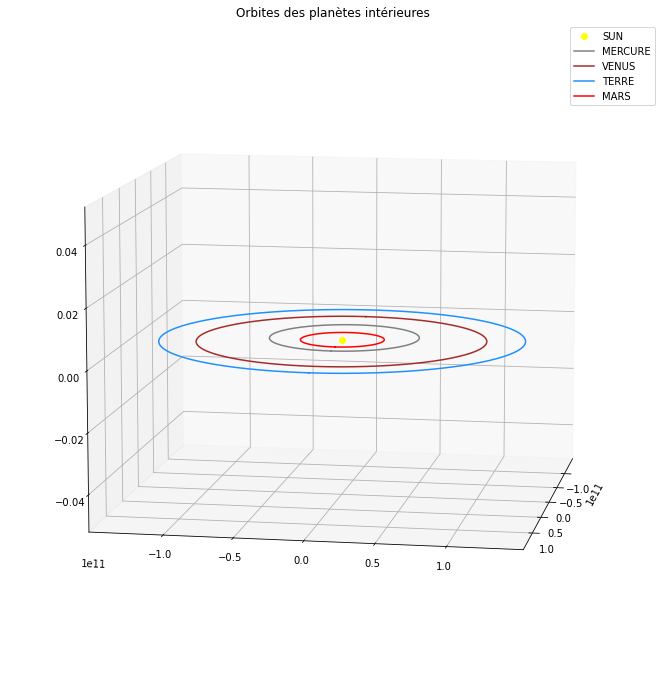

In [158]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')


#Le soleil
ax.plot(0,0,'ro',c='yellow',label='SUN')

ax.plot(MERCURE[0],MERCURE[1], c='grey', label='MERCURE')
ax.plot(VENUS[0],VENUS[1], c='brown', label='VENUS')
ax.plot(TERRE[0],TERRE[1], c='dodgerblue', label='TERRE')
ax.plot(MARS[0],MARS[1], c='red', label='MARS')

plt.title("Orbites des planètes intérieures")
legend = plt.legend(loc = 'best')


#Elevation et azimut pour changer la vue plot
ax.view_init(elev=10, azim=10)


plt.show()

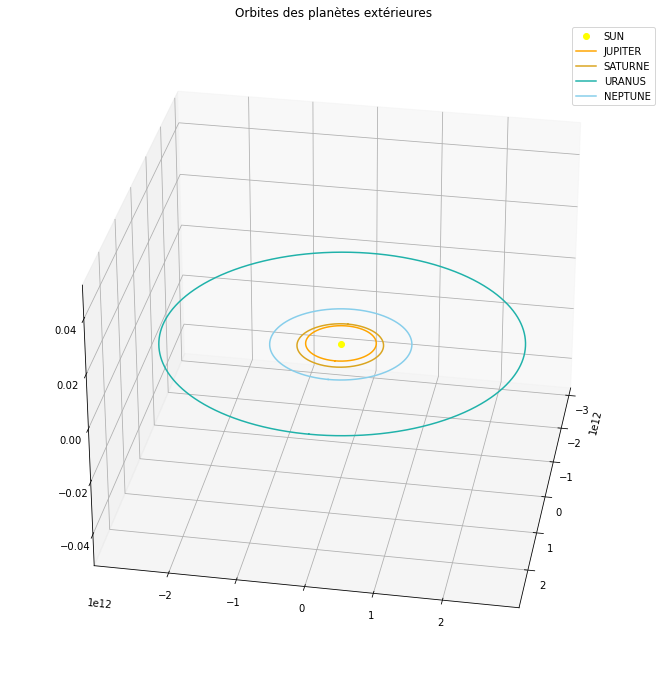

In [159]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

#Le soleil
ax.plot(0,0,'ro',c='yellow',label='SUN')

ax.plot(JUPITER[0],JUPITER[1], c='orange', label='JUPITER')
ax.plot(SATURNE[0],SATURNE[1], c='goldenrod', label='SATURNE')
ax.plot(URANUS[0],URANUS[1], c='lightseagreen', label='URANUS')
ax.plot(NEPTUNE[0],NEPTUNE[1], c='skyblue', label='NEPTUNE')

plt.title("Orbites des planètes extérieures")
legend = plt.legend(loc = 'best')

#Elevation et azimut pour changer la vue plot
ax.view_init(elev=30, azim=10)

plt.show()